In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd, norm
from numpy.random import default_rng

In [3]:
# Задача 1.1
A = np.array([[2, -4],
              [3, 5],
              [-1, 0]])
B = np.array([[1, 2, 7],
              [-3, -4, 0],
              [5, 2, 1]])
C = np.array([[6, -3, 9],
              [4, -5, 2],
              [8, 1, 5]])
AT = A.T
BT = B.T
D = np.dot(AT, C)-2*np.dot(AT, BT)
print(D)

[[ 14  14 -11]
 [-16   3  -6]]


In [7]:
# Задача 1.2
import sympy as sp
x, y, z, u = sp.symbols('x y z u') # определим символы
D = sp.Matrix([[x, 2, 3], # матрицы с использованием символов
              [-1, y, 4]])
E = sp.Matrix([[1, 2, -5],
              [2, -6, z]])
F = sp.Matrix([[8, u, -1],
              [1, 6, 4]])
eq = sp.Eq(3*D+2*E, F) # Задаем исходное уравнение

solution = sp.solve(eq, (x, y, z, u)) # Решаем уравнение
print(solution) # Выводим значения переменных

{x: 2, u: 10, y: 6, z: -4}


In [8]:
# Код проверки решения
D = np.array([[2, 2, 3],
              [-1, 6, 4]])
E = np.array([[1, 2, -5],
              [2, -6, -4]])
F = np.array([[8, 10, -1],
              [1, 6, 4]])
D = 3*D+2*E
print(D)

[[ 8 10 -1]
 [ 1  6  4]]


In [8]:
# Задача 1.3
# Так как ранг матрицы А равен 1, соответственно столбцы матрицы являются линейно зависимыми
A = np.array([[1, 2, 3],
              [3, 6, 9],
              [5, 10, 15]])
print('ранг матрицы А:', np.linalg.matrix_rank(A))
print ('p = ', A[1,2])
print ('q = ', A[2,2])

ранг матрицы А: 1
p =  9
q =  15


In [2]:
# Задача 1.4
#Проверим линейную независимость 2-х векторов
a11 = np.array([2, -5])
a21 = np.array([-1, 3])
a1 = a11.T
a2 = a21.T
matrix_a = np.array([a1, a2])
determinant = np.linalg.det(matrix_a)
if abs(determinant)!=0:
    print(determinant)
    print("a1 и a2 линейно независимы")
else:
    print(determinant)
    print("a1 и a2 линейно зависимы")

1.0
a1 и a2 линейно независимы


In [6]:
a1 = np.array([2, -5])
a2 = np.array([-1, 3])
x3 = np.array([1, 4])
x = x3.T
# Найдем координаты вектора x в новом базисе 
c1, c2 = np.linalg.solve(np.array([a1, a2]).T, x)
coord_x_B = (c1, c2)
print('Координаты вектора x в базисе B:', coord_x_B)
# Найдем координаты вектора y в стандартном базисе
сoord_y_B_T = np.array([1, 1]) 
сoord_y_B = сoord_y_B_T.T 
#Координаты в транспонированном виде в стандартном базисе будут такими же
print('Координаты вектора x в базисе B:', сoord_y_B)

Координаты вектора x в базисе B: (6.999999999999995, 12.99999999999999)
Координаты вектора x в базисе B: [1 1]


In [16]:
# Задача 1.5
n = 120
A = np.random.rand(n, n) # Сгенерируем случайную матрицу
u, s, vT = np.linalg.svd(A)
err_appr = [] # Создадим спиок для ошибок апроксимации
for r in range(2, n+1):
    A_F = np.dot(u[:, :r], np.dot(np.diag(s[:r]),vT[:r, :])) # Аппроксимируем матрицу А с рангом r
    err = np.linalg.norm(A - A_F) #Находим ошибку
    err_appr.append(err)

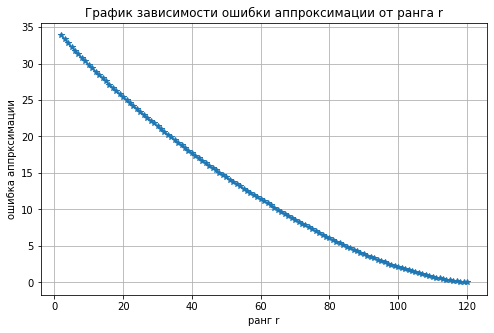

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, n+1), err_appr, marker='*')
plt.xlabel('ранг r')
plt.ylabel('ошибка аппрксимации')
plt.title('График зависимости ошибки аппроксимации от ранга r')
plt.grid(True)
plt.show()

In [22]:
# Задача 2.1
import sympy as sp
x1, x2 = sp.symbols('x1 x2')
f = x1**3-2*x1*x2+x2**2-3*x1-2*x2
# Найдем частные производные
df_dx1 = sp.diff(f, x1)
df_dx2 = sp.diff(f, x2)
d2f_dx1dx1 = sp.diff(df_dx1, x1)
d2f_dx1dx2 = sp.diff(df_dx1, x2)
d2f_dx2dx1 = sp.diff(df_dx2, x1)
d2f_dx2dx2 = sp.diff(df_dx2, x2)
H = sp.Matrix([[d2f_dx1dx1, d2f_dx1dx2], [d2f_dx2dx1, d2f_dx2dx2]]) # Матрица Гессе
print(H)
crit_points = sp.solve([df_dx1, df_dx2], (x1, x2)) # определим критические точки
for point in crit_points:
    print(point)

Matrix([[6*x1, -2], [-2, 2]])
(-1, 0)
(5/3, 8/3)


In [24]:
# Задача 2.2
x1, x2 = sp.symbols('x1 x2')
f = sp.ln(sp.sqrt(x1)+sp.sqrt(x2))
df_dx1 = sp.diff(f, x1)
df_dx2 = sp.diff(f, x2)
S = x1*df_dx1+x2*df_dx2
print(S)
res = sp.simplify(S - 1/2) # Проверка условия равенства 1/2
print(res) # При получении разницы, равной 0, условие выполнется

sqrt(x1)/(2*(sqrt(x1) + sqrt(x2))) + sqrt(x2)/(2*(sqrt(x1) + sqrt(x2)))
0
